In [2]:
import pandas as pd
import numpy as np
import os
import PIL
from keras.preprocessing.image import load_img,img_to_array
from keras import Model,Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from sklearn.model_selection import train_test_split
#conda install -c anaconda keras


Using TensorFlow backend.


In [3]:
import os

hot_dog_image_dir = 'train/hot_dog/'
hot_dog_paths = [''.join(hot_dog_image_dir+filename) for filename in 
                            os.listdir(hot_dog_image_dir)]

not_hot_dog_image_dir = 'train/not_hot_dog/'
not_hot_dog_paths = [''.join(not_hot_dog_image_dir+filename) for filename in
                            os.listdir(not_hot_dog_image_dir)]

image_paths_train = hot_dog_paths + not_hot_dog_paths
y_dog=np.ones((len(hot_dog_paths),1),dtype=int)
y_not=np.zeros((len(not_hot_dog_paths),1),dtype=int)
y_train=np.concatenate((y_dog, y_not), axis=0)
# print(image_paths_train)
# print(y_train)

###############################################################################################################
hot_dog_image_dir_test = 'test/hot_dog/'
hot_dog_paths_test = [''.join(hot_dog_image_dir_test+filename) for filename in 
                            os.listdir(hot_dog_image_dir_test)]

not_hot_dog_image_dir_test = 'test/not_hot_dog/'
not_hot_dog_paths_test = [''.join(not_hot_dog_image_dir_test+filename) for filename in
                            os.listdir(not_hot_dog_image_dir_test)]

image_paths_test = hot_dog_paths_test + not_hot_dog_paths_test
y_dog_test=np.ones((len(hot_dog_paths_test),1),dtype=int)
y_dog_not=np.zeros((len(not_hot_dog_paths_test),1),dtype=int)
y_test=np.concatenate((y_dog_test, y_dog_not), axis=0)
# print(image_paths_test)
# print(y_test)
# print(y_test.shape)

In [4]:
def loadpath(image_paths,xsize=16,ysize=16):
    X=[]
    for location in image_paths:
        img=load_img(location,target_size=(xsize,ysize))
        sx=img_to_array(img) #(512, 382, 3)
#         print(x.shape)
#         sx=sx.reshape((1,)+sx.shape) #(1, 512, 382, 3)
#         print(sx.shape)
#         print(sx)
        X.append(sx)
        input_shape=sx.shape   
    return input_shape,np.array(X)

In [6]:
# from keras.preprocessing.image import ImageDataGenerator

# def weirdfilters(x,num_gen,ImageDataGenerator(
#             rotation_range=40,
#             width_shift_range=0.2,
#             height_shift_range=0.2,
#             rescale=1./255,
#             shear_range=0.2,
#             zoom_range=0.2,
#             horizontal_flip=True,
#             fill_mode='nearest')
                 
                 
#     datagen = ImageDataGenerator(
#             rotation_range=40,
#             width_shift_range=0.2,
#             height_shift_range=0.2,
#             rescale=1./255,
#             shear_range=0.2,
#             zoom_range=0.2,
#             horizontal_flip=True,
#             fill_mode='nearest')
#     count=0
#     while(count!=x):
#         count+=1
#         datagen.flow(x,batch_size=1,save_to_dir'preview',save_prefix='cat',save_format='jpeg')
        
    
        
#     return datagen

In [ ]:
#        ,@@@@@@@@@@,,@@@@@@@%  .#&@@@&&.,@@@@@@@@@@,      %@@@@@@%*   ,@@@%     .#&@@@&&.  *&@@@@&(  ,@@@@@@@%  %@@@@@,     ,@@,          
            ,@@,    ,@@,      ,@@/   ./.    ,@@,          %@%   ,&@# .&@&@@(   .@@/   ./. #@&.  .,/  ,@@,       %@%  *&@&.  ,@@,          
            ,@@,    ,@@&%%%%. .&@@/,        ,@@,          %@%   ,&@# %@& /@@,  .&@@/,     (@@&%(*.   ,@@&%%%%.  %@%    &@#  ,@@,          
            ,@@,    ,@@/,,,,    ./#&@@@(    ,@@,          %@@@@@@%* /@@,  #@&.   ./#&@@@(   *(%&@@&. ,@@/,,,,   %@%    &@#  .&&.          
            ,@@,    ,@@,      ./,   .&@#    ,@@,          %@%      ,@@@@@@@@@% ./.   .&@# /*.   /@@. ,@@,       %@%  *&@&.   ,,           
            ,@@,    ,@@@@@@@% .#&@@@@&/     ,@@,          %@%     .&@#     ,@@/.#&@@@@&/   /%&@@@@.  ,@@@@@@@%  %@@@@@.     ,@@,          
,*************,,*/(((((//,,*(#%%%%%%%%%%%%%%%#(*,,,****************************************************,*/(((((((((/((((////****/((##%%%%%%
,*************,,//((((((//,,*(%%%%%%%%%%%%%%%%%##/*****************************************************,,*/(///(//////****//((##%%%%%%%%%%%
,************,,*/(((((((//***/#%%%%%%%%%%%%%%%%%%%#(/***************************************************,*//////////*//((#%%%%%%%%%%%%%%%%%
,***********,,*////////////***/##%%%%%%%%%%%%%%%%%%%##(*,***********************************************,,*////////(###%%%%%%%%%%%%%%%%%%%%
,**********,,,*/*******//////**/(#%%%%%%%%%%%%%%%%%%%%%#(/**********************************************,,,***/(##%%%%%%%%%%%%%%%%%%%%%%%%%
,*********,,,,*************///***/(#%%%%%%%%%%%%%%%%%%%%%%#(/***********************************,****,****/((#%%%%%%%%%%%%%%%%%%%%%%%%%%%%#
,*********,,,***************//****/(##%%%%%%%%%%%%%%%%%%%%%%##//**************//////////////////////((#####%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(
,********,,,,***********************/(#%%%%%%%%%%%%%%%%%%%%%%%##################%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(/
,*******,..,***********************,,*/##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%###((//
,*******,.,,***********************,,,,*(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(//**//
,******,.,,,************************,,,,*/(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(//*******
,*****,,,,,********,***,,,,,,,,,,,,*,,,,,,*/(######%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(/**********
,*****,..,*******,,,,,,,,,,,,,,,,,,,,,,*,,,,*///((#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%###(/************
,*****,,,*******,,,,,*,,,,,,,,,,,,,,,,,****,,,*/(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#######(//**************
,****,.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,**,,,/(%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#((//******************
,***,..,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..,,,,,,,*(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(/*******************
,**,,.,,,,,,,,,,,,,,,,,,,,,,,,,,.......,,,,,,/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#####%%%%%%%%%%%%%%%%#(/******************
,**,..,,,,,,,,,,,,,,,,,,,,,,,,,......,,,*,,,*(#%%%%%%%%##(((/(##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(((/*/((#%%%%%%%%%%%%%%#(/*****************
,*,..,,,,,,,,,,,,,,,,,,,,,,,,,,,.....,,**,,*/#%%%%%%%##((((*,**/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%##((##/,,,*(#%%%%%%%%%%%%%%#(*****************
.*,.,,,**,,,,,,,,,,,,,,,,,,,,,,,,,,*****,,,/(%%%%%%%%#(//(#/,..*/#%%%%%%%%%%%%%%%%%%%%%%%%%%%#(//(#/,..,/(#%%%%%%%%%%%%%%#/*****///////////
.,..,,,,,,,,,,,,,,,,,,,,,,,,,,*,,*******,,,(#%%%%%%%%#(*,,,....,/#%%%%%%%%%%%%%%%%%%%%%%%%%%%#(*,,,....,/(#%%%%%%%%%%%%%%#(*,**////////////
.,..,,,,,,,,,...........,,,,,,*,********,,*(#%%%%%%%%%#(/*,,...,/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(/*,,..,*/##%%%%%%%%%%%%%%%#(***////////////
...,,,,,,,................,,*,**********,,/#%%%%%%%%%%%%#((////((#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##((///(#%%%%%%%%%%%%%%%%%%(/**////////////
 ..,,,,,,.................,,,**********,,*(#%%%%%%%%%%%%%%%%%%#%%%%%%%%#((///((#%%%%%%%%%%%%%%%%%%%%%#%%%%%%%%%%%%%%%%%%%%%#/**////////////
.,,,,,,,,.................,,***********,,/(####%%%%%%%%%%%%%%%%%%%%%%%%#(/*,,,*(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(/*////////////
.,***,,,,,,..............,,,**********,..,***//((##%%%%%%%%%%%%%%%%%%%%%%%##((##%%%%%%%%%%%%%%%%%%%%%%%%%##(((((((((###%%%%%#/**///////////
.*****,,,,,,,,,,,,,,,,,,,*************,..,*******/(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##///*//////((#%%%%%#(**///////////
.****************/******/***////*****,.,*///////**/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(////////////(#%%%%%#/**//////////
.***********************/////*******,..,*//////////(#%%%%%%%%%%%%%%%%%%%%##########%%%%%%%%%%%%%%%%%%%%#(///////////*/(#%%%%%#(***/////////
.************************///********,..,*//////////#%%%%%%%%%%%%%%%%%%#(//*****///(((##%%%%%%%%%%%%%%%%#(///////////**/##%%%%##/***////////
.***********************************,.,,***///////(#%%%%%%%%%%%%%%%%#(/*,,,*//((((////(#%%%%%%%%%%%%%%%#((////////////(#%%%%%%#(*********//
,***********,,,*,,*,,**************,,,*//******//(#%%%%%%%%%%%%%%%%%#(*,,*/(((#####(((((#%%%%%%%%%%%%%%%##///////////(#%%%%%%%%#(***///////
,*************,,**,,,************,,,,,/(##((((####%%%%%%%%%%%%%%%%%%%(/**/(((#((((#((//(#%%%%%%%%%%%%%%%%%#(((((((((##%%%%%%%%%%#/**///////
,******************************,,,,,,,*(#%#%%%%%%%%%%%%%%%%%%%%%%%%%%#(**/((#(#(((#((//(#%%%%%%%%%%%%%%%%%%%%%%%#%#%%%%%%%%%%%%%#(**///////
,*************,**************,****,,,,,/(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(/*/((((#((((///(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%(/*///////
,*************************************,*/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(////////////(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#/**/////*
,******////****///////////////////////***/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%####(((((((###%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(********
.,*,****///////////////////////////////***/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(/*******
.,,,,*****//////////////////////////*******(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(*******
.,,,,,,***********/////////////////********/(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%(*******

In [5]:
from sklearn.model_selection import train_test_split

input_shape,x=loadpath(image_paths_train+image_paths_test,128,128)
y=np.concatenate((y_train, y_test), axis=0)
# from keras.utils import to_categorical
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

# y_train=y_train.transpose()
# y_test=y_test.transpose()

# y_train=np.matrix(y_train)
# y_test=np.matrix(y_test)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(798, 128, 128, 3)
(200, 128, 128, 3)
(798, 1)
(200, 1)


In [6]:
from keras import Model,Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
# Basic model1

M1 = Sequential()

M1.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))

M1.add(Conv2D(64, (3, 3), activation='relu'))

M1.add(MaxPooling2D(pool_size=(3, 3)))

M1.add(Flatten())

M1.add(Dense(128, activation='relu'))

M1.add(Dense(1, activation='sigmoid'))

M1.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 41, 41, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 107584)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               13770880  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 13,790,401
Trainable params: 13,790,401
Non-trainable params: 0
________________________________________________________________

In [8]:
import keras
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.loss = []
        self.val_acc = []
        self.acc = []
        
    def on_batch_end(self, batch, logs={}):
        self.loss.append(logs.get('loss'))
        
    def on_epoch_end(self, epoch, logs):
        self.val_acc.append(logs.get('val_acc'))
        self.acc.append(logs.get('acc'))

history_cb = LossHistory()

In [8]:
import keras
batch_size=256
epochs=100
M1.compile(loss='mean_squared_error',optimizer=keras.optimizers.Adadelta(lr=0.01),metrics=['accuracy'])

M1.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test),callbacks=[history_cb])

score = M1.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 798 samples, validate on 200 samples
Epoch 1/100
798/798 [==============================] - 33s 42ms/step - loss: 0.4936 - acc: 0.5063 - val_loss: 0.5250 - val_acc: 0.4750
Epoch 2/100
798/798 [==============================] - 33s 41ms/step - loss: 0.4935 - acc: 0.5063 - val_loss: 0.4767 - val_acc: 0.4800
Epoch 3/100
798/798 [==============================] - 33s 41ms/step - loss: 0.4935 - acc: 0.4862 - val_loss: 0.5250 - val_acc: 0.4750
Epoch 4/100
798/798 [==============================] - 33s 41ms/step - loss: 0.4937 - acc: 0.5063 - val_loss: 0.5250 - val_acc: 0.4750
Epoch 5/100
798/798 [==============================] - 33s 41ms/step - loss: 0.4937 - acc: 0.5063 - val_loss: 0.5250 - val_acc: 0.4750
Epoch 6/100
798/798 [==============================] - 35s 44ms/step - loss: 0.4937 - acc: 0.5063 - val_loss: 0.5250 - val_acc: 0.4750
Epoch 7/100
798/798 [==============================] - 35s 44ms/step - loss: 0.4937 - acc: 0.5063 - val_loss: 0.5250 - val_acc: 0.4750
Epoch 8/1

Epoch 61/100
798/798 [==============================] - 33s 41ms/step - loss: 0.4925 - acc: 0.5075 - val_loss: 0.5250 - val_acc: 0.4750
Epoch 62/100
798/798 [==============================] - 33s 41ms/step - loss: 0.4925 - acc: 0.5075 - val_loss: 0.5250 - val_acc: 0.4750
Epoch 63/100
798/798 [==============================] - 33s 41ms/step - loss: 0.4925 - acc: 0.5075 - val_loss: 0.5250 - val_acc: 0.4750
Epoch 64/100
798/798 [==============================] - 33s 41ms/step - loss: 0.4925 - acc: 0.5075 - val_loss: 0.5250 - val_acc: 0.4750
Epoch 65/100
798/798 [==============================] - 33s 41ms/step - loss: 0.4925 - acc: 0.5075 - val_loss: 0.5250 - val_acc: 0.4750
Epoch 66/100
798/798 [==============================] - 33s 41ms/step - loss: 0.4925 - acc: 0.5075 - val_loss: 0.5250 - val_acc: 0.4750
Epoch 67/100
798/798 [==============================] - 33s 41ms/step - loss: 0.4925 - acc: 0.5075 - val_loss: 0.5250 - val_acc: 0.4750
Epoch 68/100
798/798 [==========================

In [10]:
M1.save('Skynet_M1')
# model = keras.models.load_model('')

Text(0, 0.5, 'Accuracy')

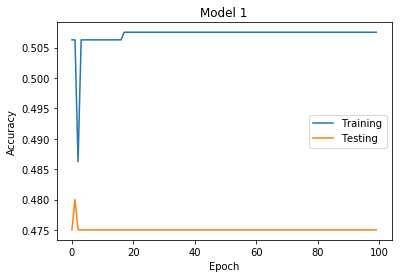

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

model1Hist = history_cb
plt.plot(model1Hist.acc)
plt.plot(model1Hist.val_acc)
plt.title('Model 1')
plt.legend(("Training", "Testing"), loc="best")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [ ]:
#        ,@@@@@@@@@@,,@@@@@@@%  .#&@@@&&.,@@@@@@@@@@,      %@@@@@@%*   ,@@@%     .#&@@@&&.  *&@@@@&(  ,@@@@@@@%  %@@@@@,     ,@@,          
            ,@@,    ,@@,      ,@@/   ./.    ,@@,          %@%   ,&@# .&@&@@(   .@@/   ./. #@&.  .,/  ,@@,       %@%  *&@&.  ,@@,          
            ,@@,    ,@@&%%%%. .&@@/,        ,@@,          %@%   ,&@# %@& /@@,  .&@@/,     (@@&%(*.   ,@@&%%%%.  %@%    &@#  ,@@,          
            ,@@,    ,@@/,,,,    ./#&@@@(    ,@@,          %@@@@@@%* /@@,  #@&.   ./#&@@@(   *(%&@@&. ,@@/,,,,   %@%    &@#  .&&.          
            ,@@,    ,@@,      ./,   .&@#    ,@@,          %@%      ,@@@@@@@@@% ./.   .&@# /*.   /@@. ,@@,       %@%  *&@&.   ,,           
            ,@@,    ,@@@@@@@% .#&@@@@&/     ,@@,          %@%     .&@#     ,@@/.#&@@@@&/   /%&@@@@.  ,@@@@@@@%  %@@@@@.     ,@@,          
,*************,,*/(((((//,,*(#%%%%%%%%%%%%%%%#(*,,,****************************************************,*/(((((((((/((((////****/((##%%%%%%
,*************,,//((((((//,,*(%%%%%%%%%%%%%%%%%##/*****************************************************,,*/(///(//////****//((##%%%%%%%%%%%
,************,,*/(((((((//***/#%%%%%%%%%%%%%%%%%%%#(/***************************************************,*//////////*//((#%%%%%%%%%%%%%%%%%
,***********,,*////////////***/##%%%%%%%%%%%%%%%%%%%##(*,***********************************************,,*////////(###%%%%%%%%%%%%%%%%%%%%
,**********,,,*/*******//////**/(#%%%%%%%%%%%%%%%%%%%%%#(/**********************************************,,,***/(##%%%%%%%%%%%%%%%%%%%%%%%%%
,*********,,,,*************///***/(#%%%%%%%%%%%%%%%%%%%%%%#(/***********************************,****,****/((#%%%%%%%%%%%%%%%%%%%%%%%%%%%%#
,*********,,,***************//****/(##%%%%%%%%%%%%%%%%%%%%%%##//**************//////////////////////((#####%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(
,********,,,,***********************/(#%%%%%%%%%%%%%%%%%%%%%%%##################%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(/
,*******,..,***********************,,*/##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%###((//
,*******,.,,***********************,,,,*(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(//**//
,******,.,,,************************,,,,*/(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(//*******
,*****,,,,,********,***,,,,,,,,,,,,*,,,,,,*/(######%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(/**********
,*****,..,*******,,,,,,,,,,,,,,,,,,,,,,*,,,,*///((#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%###(/************
,*****,,,*******,,,,,*,,,,,,,,,,,,,,,,,****,,,*/(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#######(//**************
,****,.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,**,,,/(%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#((//******************
,***,..,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..,,,,,,,*(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(/*******************
,**,,.,,,,,,,,,,,,,,,,,,,,,,,,,,.......,,,,,,/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#####%%%%%%%%%%%%%%%%#(/******************
,**,..,,,,,,,,,,,,,,,,,,,,,,,,,......,,,*,,,*(#%%%%%%%%##(((/(##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(((/*/((#%%%%%%%%%%%%%%#(/*****************
,*,..,,,,,,,,,,,,,,,,,,,,,,,,,,,.....,,**,,*/#%%%%%%%##((((*,**/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%##((##/,,,*(#%%%%%%%%%%%%%%#(*****************
.*,.,,,**,,,,,,,,,,,,,,,,,,,,,,,,,,*****,,,/(%%%%%%%%#(//(#/,..*/#%%%%%%%%%%%%%%%%%%%%%%%%%%%#(//(#/,..,/(#%%%%%%%%%%%%%%#/*****///////////
.,..,,,,,,,,,,,,,,,,,,,,,,,,,,*,,*******,,,(#%%%%%%%%#(*,,,....,/#%%%%%%%%%%%%%%%%%%%%%%%%%%%#(*,,,....,/(#%%%%%%%%%%%%%%#(*,**////////////
.,..,,,,,,,,,...........,,,,,,*,********,,*(#%%%%%%%%%#(/*,,...,/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(/*,,..,*/##%%%%%%%%%%%%%%%#(***////////////
...,,,,,,,................,,*,**********,,/#%%%%%%%%%%%%#((////((#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##((///(#%%%%%%%%%%%%%%%%%%(/**////////////
 ..,,,,,,.................,,,**********,,*(#%%%%%%%%%%%%%%%%%%#%%%%%%%%#((///((#%%%%%%%%%%%%%%%%%%%%%#%%%%%%%%%%%%%%%%%%%%%#/**////////////
.,,,,,,,,.................,,***********,,/(####%%%%%%%%%%%%%%%%%%%%%%%%#(/*,,,*(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(/*////////////
.,***,,,,,,..............,,,**********,..,***//((##%%%%%%%%%%%%%%%%%%%%%%%##((##%%%%%%%%%%%%%%%%%%%%%%%%%##(((((((((###%%%%%#/**///////////
.*****,,,,,,,,,,,,,,,,,,,*************,..,*******/(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##///*//////((#%%%%%#(**///////////
.****************/******/***////*****,.,*///////**/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(////////////(#%%%%%#/**//////////
.***********************/////*******,..,*//////////(#%%%%%%%%%%%%%%%%%%%%##########%%%%%%%%%%%%%%%%%%%%#(///////////*/(#%%%%%#(***/////////
.************************///********,..,*//////////#%%%%%%%%%%%%%%%%%%#(//*****///(((##%%%%%%%%%%%%%%%%#(///////////**/##%%%%##/***////////
.***********************************,.,,***///////(#%%%%%%%%%%%%%%%%#(/*,,,*//((((////(#%%%%%%%%%%%%%%%#((////////////(#%%%%%%#(*********//
,***********,,,*,,*,,**************,,,*//******//(#%%%%%%%%%%%%%%%%%#(*,,*/(((#####(((((#%%%%%%%%%%%%%%%##///////////(#%%%%%%%%#(***///////
,*************,,**,,,************,,,,,/(##((((####%%%%%%%%%%%%%%%%%%%(/**/(((#((((#((//(#%%%%%%%%%%%%%%%%%#(((((((((##%%%%%%%%%%#/**///////
,******************************,,,,,,,*(#%#%%%%%%%%%%%%%%%%%%%%%%%%%%#(**/((#(#(((#((//(#%%%%%%%%%%%%%%%%%%%%%%%#%#%%%%%%%%%%%%%#(**///////
,*************,**************,****,,,,,/(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(/*/((((#((((///(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%(/*///////
,*************************************,*/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(////////////(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#/**/////*
,******////****///////////////////////***/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%####(((((((###%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(********
.,*,****///////////////////////////////***/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(/*******
.,,,,*****//////////////////////////*******(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(*******
.,,,,,,***********/////////////////********/(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%(*******

In [5]:
from sklearn.model_selection import train_test_split

input_shape,x=loadpath(image_paths_train+image_paths_test,200,200)
y=np.concatenate((y_train, y_test), axis=0)
# from keras.utils import to_categorical
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

# y_train=y_train.transpose()
# y_test=y_test.transpose()

# y_train=np.matrix(y_train)
# y_test=np.matrix(y_test)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=420,shuffle=True)


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(input_shape)

(898, 200, 200, 3)
(100, 200, 200, 3)
(898, 1)
(100, 1)
(200, 200, 3)


In [6]:
from keras import Model,Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
# Basic model1

M2 = Sequential()

M2.add(Conv2D(32, kernel_size=(3, 3),strides=(1,1),activation='relu',input_shape=input_shape))
M2.add(Conv2D(32, (3, 3), activation='relu'))

M2.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2)))

M2.add(Conv2D(64, (3, 3), activation='relu'))
M2.add(Conv2D(64, (3, 3), activation='relu'))

M2.add(MaxPooling2D(pool_size=(4, 4)))

M2.add(Conv2D(128, (4, 4), activation='relu'))
M2.add(Conv2D(128, (4, 4), activation='relu'))

M2.add(MaxPooling2D(pool_size=(5, 5)))

M2.add(Flatten())

M2.add(Dense(2100,activation='relu'))

M2.add(Dense(1420,activation='relu'))

M2.add(Dense(128, activation='relu'))

M2.add(Dense(1, activation='sigmoid'))

M2.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 196, 196, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 97, 97, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 95, 95, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 93, 93, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 20, 20, 128)       131200    
__________

In [ ]:
import keras

history_cb1 = LossHistory()

batch_size=256
epochs=100
M2.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adadelta(lr=0.01),metrics=['accuracy'])

M2.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test),callbacks=[history_cb1])

score = M2.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 898 samples, validate on 100 samples
Epoch 1/100
512/898 [================>.............] - ETA: 50s - loss: 1.1096 - acc: 0.5117 

In [ ]:
M2.save('Skynet_M2')
# model = keras.models.load_model('')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

model2Hist = history_cb1
plt.plot(model2Hist.acc)
plt.plot(model2Hist.val_acc)
plt.title('Model 2')
plt.legend(("Training", "Testing"), loc="best")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [ ]:
#        ,@@@@@@@@@@,,@@@@@@@%  .#&@@@&&.,@@@@@@@@@@,      %@@@@@@%*   ,@@@%     .#&@@@&&.  *&@@@@&(  ,@@@@@@@%  %@@@@@,     ,@@,          
            ,@@,    ,@@,      ,@@/   ./.    ,@@,          %@%   ,&@# .&@&@@(   .@@/   ./. #@&.  .,/  ,@@,       %@%  *&@&.  ,@@,          
            ,@@,    ,@@&%%%%. .&@@/,        ,@@,          %@%   ,&@# %@& /@@,  .&@@/,     (@@&%(*.   ,@@&%%%%.  %@%    &@#  ,@@,          
            ,@@,    ,@@/,,,,    ./#&@@@(    ,@@,          %@@@@@@%* /@@,  #@&.   ./#&@@@(   *(%&@@&. ,@@/,,,,   %@%    &@#  .&&.          
            ,@@,    ,@@,      ./,   .&@#    ,@@,          %@%      ,@@@@@@@@@% ./.   .&@# /*.   /@@. ,@@,       %@%  *&@&.   ,,           
            ,@@,    ,@@@@@@@% .#&@@@@&/     ,@@,          %@%     .&@#     ,@@/.#&@@@@&/   /%&@@@@.  ,@@@@@@@%  %@@@@@.     ,@@,          
,*************,,*/(((((//,,*(#%%%%%%%%%%%%%%%#(*,,,****************************************************,*/(((((((((/((((////****/((##%%%%%%
,*************,,//((((((//,,*(%%%%%%%%%%%%%%%%%##/*****************************************************,,*/(///(//////****//((##%%%%%%%%%%%
,************,,*/(((((((//***/#%%%%%%%%%%%%%%%%%%%#(/***************************************************,*//////////*//((#%%%%%%%%%%%%%%%%%
,***********,,*////////////***/##%%%%%%%%%%%%%%%%%%%##(*,***********************************************,,*////////(###%%%%%%%%%%%%%%%%%%%%
,**********,,,*/*******//////**/(#%%%%%%%%%%%%%%%%%%%%%#(/**********************************************,,,***/(##%%%%%%%%%%%%%%%%%%%%%%%%%
,*********,,,,*************///***/(#%%%%%%%%%%%%%%%%%%%%%%#(/***********************************,****,****/((#%%%%%%%%%%%%%%%%%%%%%%%%%%%%#
,*********,,,***************//****/(##%%%%%%%%%%%%%%%%%%%%%%##//**************//////////////////////((#####%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(
,********,,,,***********************/(#%%%%%%%%%%%%%%%%%%%%%%%##################%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(/
,*******,..,***********************,,*/##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%###((//
,*******,.,,***********************,,,,*(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(//**//
,******,.,,,************************,,,,*/(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(//*******
,*****,,,,,********,***,,,,,,,,,,,,*,,,,,,*/(######%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(/**********
,*****,..,*******,,,,,,,,,,,,,,,,,,,,,,*,,,,*///((#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%###(/************
,*****,,,*******,,,,,*,,,,,,,,,,,,,,,,,****,,,*/(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#######(//**************
,****,.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,**,,,/(%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#((//******************
,***,..,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..,,,,,,,*(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(/*******************
,**,,.,,,,,,,,,,,,,,,,,,,,,,,,,,.......,,,,,,/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#####%%%%%%%%%%%%%%%%#(/******************
,**,..,,,,,,,,,,,,,,,,,,,,,,,,,......,,,*,,,*(#%%%%%%%%##(((/(##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(((/*/((#%%%%%%%%%%%%%%#(/*****************
,*,..,,,,,,,,,,,,,,,,,,,,,,,,,,,.....,,**,,*/#%%%%%%%##((((*,**/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%##((##/,,,*(#%%%%%%%%%%%%%%#(*****************
.*,.,,,**,,,,,,,,,,,,,,,,,,,,,,,,,,*****,,,/(%%%%%%%%#(//(#/,..*/#%%%%%%%%%%%%%%%%%%%%%%%%%%%#(//(#/,..,/(#%%%%%%%%%%%%%%#/*****///////////
.,..,,,,,,,,,,,,,,,,,,,,,,,,,,*,,*******,,,(#%%%%%%%%#(*,,,....,/#%%%%%%%%%%%%%%%%%%%%%%%%%%%#(*,,,....,/(#%%%%%%%%%%%%%%#(*,**////////////
.,..,,,,,,,,,...........,,,,,,*,********,,*(#%%%%%%%%%#(/*,,...,/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(/*,,..,*/##%%%%%%%%%%%%%%%#(***////////////
...,,,,,,,................,,*,**********,,/#%%%%%%%%%%%%#((////((#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##((///(#%%%%%%%%%%%%%%%%%%(/**////////////
 ..,,,,,,.................,,,**********,,*(#%%%%%%%%%%%%%%%%%%#%%%%%%%%#((///((#%%%%%%%%%%%%%%%%%%%%%#%%%%%%%%%%%%%%%%%%%%%#/**////////////
.,,,,,,,,.................,,***********,,/(####%%%%%%%%%%%%%%%%%%%%%%%%#(/*,,,*(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(/*////////////
.,***,,,,,,..............,,,**********,..,***//((##%%%%%%%%%%%%%%%%%%%%%%%##((##%%%%%%%%%%%%%%%%%%%%%%%%%##(((((((((###%%%%%#/**///////////
.*****,,,,,,,,,,,,,,,,,,,*************,..,*******/(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##///*//////((#%%%%%#(**///////////
.****************/******/***////*****,.,*///////**/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(////////////(#%%%%%#/**//////////
.***********************/////*******,..,*//////////(#%%%%%%%%%%%%%%%%%%%%##########%%%%%%%%%%%%%%%%%%%%#(///////////*/(#%%%%%#(***/////////
.************************///********,..,*//////////#%%%%%%%%%%%%%%%%%%#(//*****///(((##%%%%%%%%%%%%%%%%#(///////////**/##%%%%##/***////////
.***********************************,.,,***///////(#%%%%%%%%%%%%%%%%#(/*,,,*//((((////(#%%%%%%%%%%%%%%%#((////////////(#%%%%%%#(*********//
,***********,,,*,,*,,**************,,,*//******//(#%%%%%%%%%%%%%%%%%#(*,,*/(((#####(((((#%%%%%%%%%%%%%%%##///////////(#%%%%%%%%#(***///////
,*************,,**,,,************,,,,,/(##((((####%%%%%%%%%%%%%%%%%%%(/**/(((#((((#((//(#%%%%%%%%%%%%%%%%%#(((((((((##%%%%%%%%%%#/**///////
,******************************,,,,,,,*(#%#%%%%%%%%%%%%%%%%%%%%%%%%%%#(**/((#(#(((#((//(#%%%%%%%%%%%%%%%%%%%%%%%#%#%%%%%%%%%%%%%#(**///////
,*************,**************,****,,,,,/(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(/*/((((#((((///(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%(/*///////
,*************************************,*/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(////////////(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#/**/////*
,******////****///////////////////////***/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%####(((((((###%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(********
.,*,****///////////////////////////////***/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(/*******
.,,,,*****//////////////////////////*******(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(*******
.,,,,,,***********/////////////////********/(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%(*******

In [ ]:
from sklearn.model_selection import train_test_split

input_shape,x=loadpath(image_paths_train+image_paths_test,250,250)
y=np.concatenate((y_train, y_test), axis=0)
# from keras.utils import to_categorical
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

# y_train=y_train.transpose()
# y_test=y_test.transpose()

# y_train=np.matrix(y_train)
# y_test=np.matrix(y_test)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=420,shuffle=True)


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(input_shape)

In [ ]:
from keras import Model,Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
# Basic model1

M3 = Sequential()

M3.add(Conv2D(32, kernel_size=(3, 3),strides=(1,1),activation='relu',input_shape=input_shape))
M3.add(Conv2D(32, (3, 3), activation='relu'))

M3.add(BatchNormalization())

M3.add(Dropout(.200000000000000000000000000000000000000000001))

M3.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2)))

M3.add(Conv2D(64, (3, 3), activation='relu'))
M3.add(Conv2D(64, (3, 3), activation='relu'))

M3.add(Dropout(.200000000000000000000000000000000000000000001))

M3.add(BatchNormalization())

M3.add(MaxPooling2D(pool_size=(4, 4)))

M3.add(Conv2D(128, (4, 4), activation='relu'))
M3.add(Conv2D(128, (4, 4), activation='relu'))

M3.add(BatchNormalization())

M3.add(Dropout(.200000000000000000000000000000000000000000001))

M3.add(MaxPooling2D(pool_size=(4, 4)))

M3.add(Conv2D(256, (4, 4), activation='relu'))
M3.add(Conv2D(256, (4, 4), activation='relu'))


M3.add(MaxPooling2D(pool_size=(5, 5)))

M3.add(BatchNormalization())

M3.add(Dropout(.200000000000000000000000000000000000000000001))

M3.add(Flatten())

M3.add(Dense(2100,activation='relu'))

M3.add(Dense(1420,activation='relu'))

M3.add(Dense(720,activation='relu'))

M3.add(Dense(128, activation='relu'))

M3.add(Dense(1, activation='sigmoid'))

M3.summary()


In [ ]:
#        ,@@@@@@@@@@,,@@@@@@@%  .#&@@@&&.,@@@@@@@@@@,      %@@@@@@%*   ,@@@%     .#&@@@&&.  *&@@@@&(  ,@@@@@@@%  %@@@@@,     ,@@,          
            ,@@,    ,@@,      ,@@/   ./.    ,@@,          %@%   ,&@# .&@&@@(   .@@/   ./. #@&.  .,/  ,@@,       %@%  *&@&.  ,@@,          
            ,@@,    ,@@&%%%%. .&@@/,        ,@@,          %@%   ,&@# %@& /@@,  .&@@/,     (@@&%(*.   ,@@&%%%%.  %@%    &@#  ,@@,          
            ,@@,    ,@@/,,,,    ./#&@@@(    ,@@,          %@@@@@@%* /@@,  #@&.   ./#&@@@(   *(%&@@&. ,@@/,,,,   %@%    &@#  .&&.          
            ,@@,    ,@@,      ./,   .&@#    ,@@,          %@%      ,@@@@@@@@@% ./.   .&@# /*.   /@@. ,@@,       %@%  *&@&.   ,,           
            ,@@,    ,@@@@@@@% .#&@@@@&/     ,@@,          %@%     .&@#     ,@@/.#&@@@@&/   /%&@@@@.  ,@@@@@@@%  %@@@@@.     ,@@,          
,*************,,*/(((((//,,*(#%%%%%%%%%%%%%%%#(*,,,****************************************************,*/(((((((((/((((////****/((##%%%%%%
,*************,,//((((((//,,*(%%%%%%%%%%%%%%%%%##/*****************************************************,,*/(///(//////****//((##%%%%%%%%%%%
,************,,*/(((((((//***/#%%%%%%%%%%%%%%%%%%%#(/***************************************************,*//////////*//((#%%%%%%%%%%%%%%%%%
,***********,,*////////////***/##%%%%%%%%%%%%%%%%%%%##(*,***********************************************,,*////////(###%%%%%%%%%%%%%%%%%%%%
,**********,,,*/*******//////**/(#%%%%%%%%%%%%%%%%%%%%%#(/**********************************************,,,***/(##%%%%%%%%%%%%%%%%%%%%%%%%%
,*********,,,,*************///***/(#%%%%%%%%%%%%%%%%%%%%%%#(/***********************************,****,****/((#%%%%%%%%%%%%%%%%%%%%%%%%%%%%#
,*********,,,***************//****/(##%%%%%%%%%%%%%%%%%%%%%%##//**************//////////////////////((#####%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(
,********,,,,***********************/(#%%%%%%%%%%%%%%%%%%%%%%%##################%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(/
,*******,..,***********************,,*/##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%###((//
,*******,.,,***********************,,,,*(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(//**//
,******,.,,,************************,,,,*/(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(//*******
,*****,,,,,********,***,,,,,,,,,,,,*,,,,,,*/(######%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(/**********
,*****,..,*******,,,,,,,,,,,,,,,,,,,,,,*,,,,*///((#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%###(/************
,*****,,,*******,,,,,*,,,,,,,,,,,,,,,,,****,,,*/(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#######(//**************
,****,.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,**,,,/(%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#((//******************
,***,..,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..,,,,,,,*(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(/*******************
,**,,.,,,,,,,,,,,,,,,,,,,,,,,,,,.......,,,,,,/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#####%%%%%%%%%%%%%%%%#(/******************
,**,..,,,,,,,,,,,,,,,,,,,,,,,,,......,,,*,,,*(#%%%%%%%%##(((/(##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(((/*/((#%%%%%%%%%%%%%%#(/*****************
,*,..,,,,,,,,,,,,,,,,,,,,,,,,,,,.....,,**,,*/#%%%%%%%##((((*,**/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%##((##/,,,*(#%%%%%%%%%%%%%%#(*****************
.*,.,,,**,,,,,,,,,,,,,,,,,,,,,,,,,,*****,,,/(%%%%%%%%#(//(#/,..*/#%%%%%%%%%%%%%%%%%%%%%%%%%%%#(//(#/,..,/(#%%%%%%%%%%%%%%#/*****///////////
.,..,,,,,,,,,,,,,,,,,,,,,,,,,,*,,*******,,,(#%%%%%%%%#(*,,,....,/#%%%%%%%%%%%%%%%%%%%%%%%%%%%#(*,,,....,/(#%%%%%%%%%%%%%%#(*,**////////////
.,..,,,,,,,,,...........,,,,,,*,********,,*(#%%%%%%%%%#(/*,,...,/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(/*,,..,*/##%%%%%%%%%%%%%%%#(***////////////
...,,,,,,,................,,*,**********,,/#%%%%%%%%%%%%#((////((#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##((///(#%%%%%%%%%%%%%%%%%%(/**////////////
 ..,,,,,,.................,,,**********,,*(#%%%%%%%%%%%%%%%%%%#%%%%%%%%#((///((#%%%%%%%%%%%%%%%%%%%%%#%%%%%%%%%%%%%%%%%%%%%#/**////////////
.,,,,,,,,.................,,***********,,/(####%%%%%%%%%%%%%%%%%%%%%%%%#(/*,,,*(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(/*////////////
.,***,,,,,,..............,,,**********,..,***//((##%%%%%%%%%%%%%%%%%%%%%%%##((##%%%%%%%%%%%%%%%%%%%%%%%%%##(((((((((###%%%%%#/**///////////
.*****,,,,,,,,,,,,,,,,,,,*************,..,*******/(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##///*//////((#%%%%%#(**///////////
.****************/******/***////*****,.,*///////**/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(////////////(#%%%%%#/**//////////
.***********************/////*******,..,*//////////(#%%%%%%%%%%%%%%%%%%%%##########%%%%%%%%%%%%%%%%%%%%#(///////////*/(#%%%%%#(***/////////
.************************///********,..,*//////////#%%%%%%%%%%%%%%%%%%#(//*****///(((##%%%%%%%%%%%%%%%%#(///////////**/##%%%%##/***////////
.***********************************,.,,***///////(#%%%%%%%%%%%%%%%%#(/*,,,*//((((////(#%%%%%%%%%%%%%%%#((////////////(#%%%%%%#(*********//
,***********,,,*,,*,,**************,,,*//******//(#%%%%%%%%%%%%%%%%%#(*,,*/(((#####(((((#%%%%%%%%%%%%%%%##///////////(#%%%%%%%%#(***///////
,*************,,**,,,************,,,,,/(##((((####%%%%%%%%%%%%%%%%%%%(/**/(((#((((#((//(#%%%%%%%%%%%%%%%%%#(((((((((##%%%%%%%%%%#/**///////
,******************************,,,,,,,*(#%#%%%%%%%%%%%%%%%%%%%%%%%%%%#(**/((#(#(((#((//(#%%%%%%%%%%%%%%%%%%%%%%%#%#%%%%%%%%%%%%%#(**///////
,*************,**************,****,,,,,/(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(/*/((((#((((///(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%(/*///////
,*************************************,*/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(////////////(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#/**/////*
,******////****///////////////////////***/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%####(((((((###%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(********
.,*,****///////////////////////////////***/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(/*******
.,,,,*****//////////////////////////*******(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(*******
.,,,,,,***********/////////////////********/(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%(*******

In [ ]:
import keras

history_cb2 = LossHistory()

batch_size=256
epochs=100
M3.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adadelta(lr=0.01),metrics=['accuracy'])

M3.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test),callbacks=[history_cb2])

score = M3.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
M3.save('Skynet_M3')
# model = keras.models.load_model('')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

model3Hist = history_cb2
plt.plot(model3Hist.acc)
plt.plot(model3Hist.val_acc)
plt.title('Model 3')
plt.legend(("Training", "Testing"), loc="best")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')